# Decision Trees

## Regression Tree

모듈 import하기

In [3]:
from sklearn.tree import DecisionTreeRegressor

데이터 준비하기

In [4]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

모델 만들기

In [5]:
clf = DecisionTreeRegressor()

모델 학습하기

In [6]:
clf = clf.fit(X, y)

모델로 예측하기

In [7]:
clf.predict([[1, 1]])

array([ 0.5])

## Classification Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
X = [[0, 0], [1, 1]]
Y = [0, 1]

In [54]:
clf = DecisionTreeClassifier()

In [55]:
clf = clf.fit(X, Y)

In [56]:
clf.predict([[2., 2.]])

array([1])

확률로 예측하기

In [57]:
clf.predict_proba([[2., 2.]])

array([[ 0.,  1.]])

## Multiclass Classification

클래스가 여러 개일 때 트리 모델 역시 scikit-learn 내에 구현되어 있다.

In [13]:
from sklearn.datasets import load_iris

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
iris = load_iris()

In [42]:
clf = DecisionTreeClassifier()

In [43]:
clf = clf.fit(iris.data, iris.target)

In [44]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

training set accuracy

In [45]:
clf.score(iris.data, iris.target)

1.0

## hyperparameters

### stopping criterion

- max_depth : 트리의 최대 깊이
- min_samples_split : 내부 노드가 분할(split)되기 위해 가져야 하는 최소 샘플 수 (int 또는 float)
- min_samples_leaf : 잎 노드가 가져야 하는 최소 샘플 수 (int 또는 float)
- max_leaf_nodes : 최대 잎 노드의 개수

## Visualizationn

In [46]:
from IPython.display import Image
from sklearn import tree
import pydotplus 

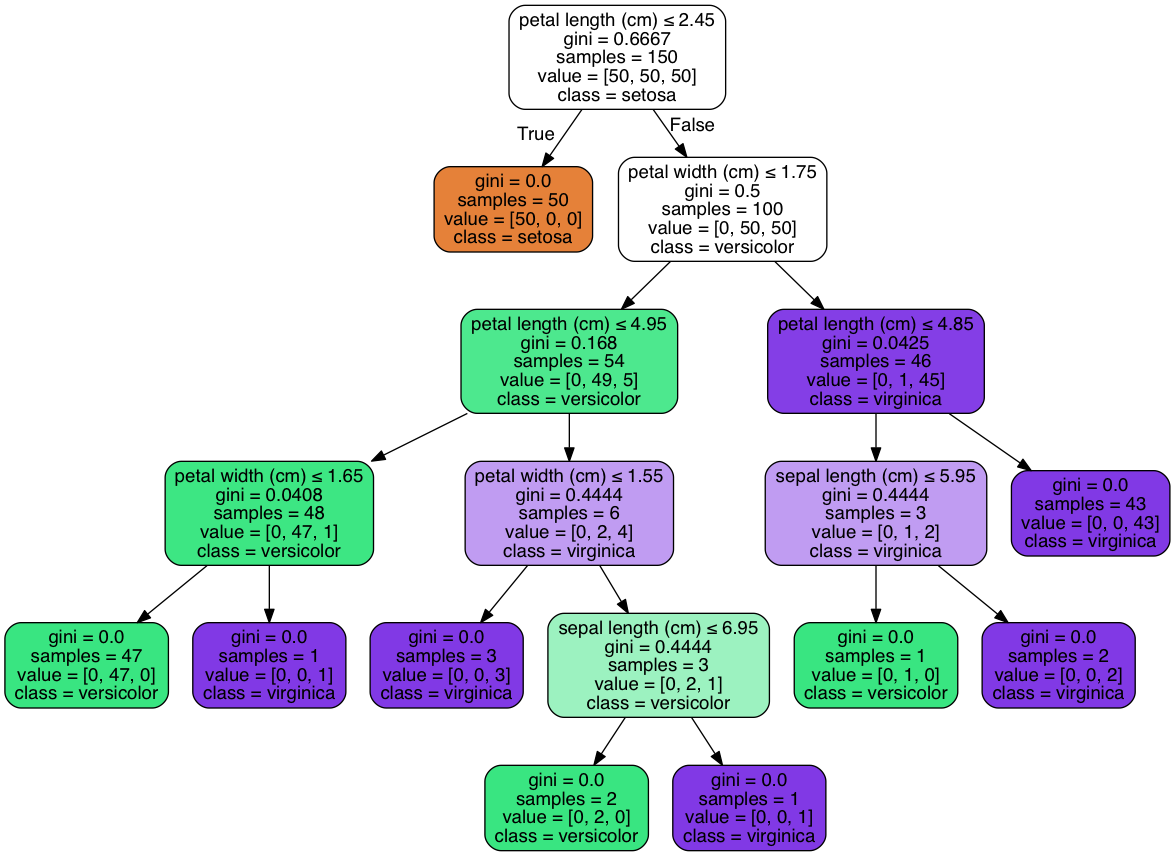

In [47]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Bagging

In [58]:
from sklearn.ensemble import BaggingClassifier

Bagging은 트리만을 위한 기법은 아니다. 여기서는 KNeighbors라는 모델에 써보자.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

### hyperparameters

- n_estimators : estimator의 갯수
- max_samples : 원 데이터셋에서 bootstrap으로 뽑아낼 샘플 수 (또는 비율)
- max_features : 원 데이터셋에서 뽑아낼 features의 갯수 또는 비율. 
    (원래 bootstrapping에는 없는 개념이지만 scikit-learn은 이것까지 구현해놓았다.)
- bootstrap : True or False. 샘플을 뽑을 때 뽑은 거 또 뽑을 수 있게 할지 (with replacemennt)
- bottstrap_features : True or False. feature를 뽑을 때 뽑은 거 또 뽑을 수 있게 할지 (with replacemennt)

regressionn을 위한 Bagging도 동일하게 존재한다.

In [61]:
from sklearn.ensemble import BaggingRegressor

## Random Forests

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
X = [[0, 0], [1, 1]]
Y = [0, 1]

In [64]:
clf = RandomForestClassifier(n_estimators=10)

In [65]:
clf = clf.fit(X, Y)

### hyperparameters

#### stopping criterion

- max_depth : 트리의 최대 깊이
- min_samples_split : 내부 노드가 분할(split)되기 위해 가져야 하는 최소 샘플 수 (int 또는 float)
- min_samples_leaf : 잎 노드가 가져야 하는 최소 샘플 수 (int 또는 float)
- max_leaf_nodes : 최대 잎 노드의 개수

기타

- n_estimators : estimator의 갯수
- max_features : split할 때 볼 feature의 숫자

    - 정수면 분할할 때 max_features 개만큼만 고려한다.
    - float면, 비율이다. int(max_features * n_features)개 만큼만 고려.
    - 'auto'면 제곱근
    - 'sqrt'면 제곱근. auto와 같다.
    - 'log2'면, log2(n_features)
    - None이면, 모든 feature를 고려한다.

## Feature importance

모델에서 중요하게 쓰인 feature를 찾아낼 수 있다.

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
import pandas as pd

In [74]:
import numpy as np

In [67]:
clf = RandomForestClassifier(n_estimators=10)

In [68]:
clf = clf.fit(iris.data, iris.target)

In [70]:
importances = clf.feature_importances_
importances

array([ 0.076451  ,  0.01661413,  0.53738141,  0.36955346])

In [76]:
pd.Series(importances, index=iris.feature_names)

sepal length (cm)    0.076451
sepal width (cm)     0.016614
petal length (cm)    0.537381
petal width (cm)     0.369553
dtype: float64

In [86]:
%matplotlib inline
from matplotlib import pyplot as plt

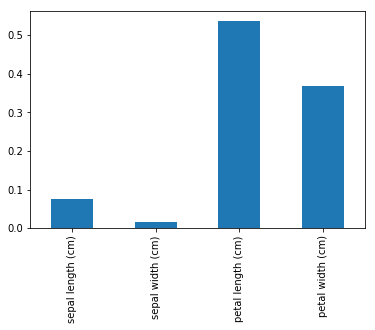

In [80]:
pd.Series(importances, index=iris.feature_names).plot(kind='bar')

분산까지 고려해보자.

In [91]:
from sklearn.datasets import make_classification

In [97]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

In [101]:
clf = RandomForestClassifier(n_estimators=10)

In [102]:
clf = clf.fit(X, y)

In [106]:
importances = clf.feature_importances_
importances

array([ 0.22914664,  0.33766263,  0.15325739,  0.04130984,  0.03353703,
        0.0378574 ,  0.04312622,  0.03836166,  0.04230122,  0.04343996])

In [107]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)

In [108]:
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 1 (0.337663)
2. feature 0 (0.229147)
3. feature 2 (0.153257)
4. feature 9 (0.043440)
5. feature 6 (0.043126)
6. feature 8 (0.042301)
7. feature 3 (0.041310)
8. feature 7 (0.038362)
9. feature 5 (0.037857)
10. feature 4 (0.033537)


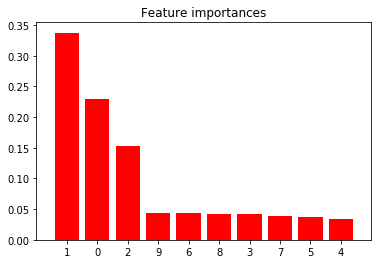

In [109]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [110]:
clf.oob_score

False

# Boosting

In [116]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [117]:
# Create the dataset
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [118]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=1)

In [119]:
regr_1.fit(X, y)
regr_2.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=1)

In [120]:
# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

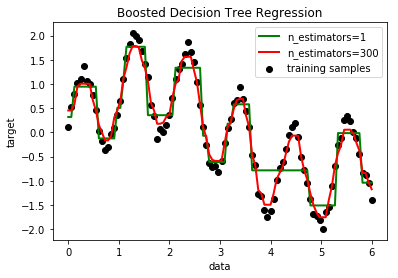

In [121]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# Partial Dependence Plots

Partial dependence plots는 특성 변수(feature)가 변하면서 (다른 변수들이 동일하다고 가정했을 때) 예측 변수의 값이 어떻게 달라지는지 보여준다.

[Exploratory Data Analysis using Random Forests](http://zmjones.com/static/papers/rfss_manuscript.pdf)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split

Gradient Boosting 모델의 partial dependence plots를 그려보자.

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing,

캘리포니아 집값 데이터를 써보자.

In [124]:
cal_housing = fetch_california_housing()

# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)
names = cal_housing.feature_names

In [129]:
print(cal_housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




모델을 만들고 학습시킨다.

In [125]:
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                learning_rate=0.1, loss='huber',
                                random_state=1)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

보고 싶은 features 번호를 선정하고 scikit-learn의 함수를 이용해서 partial dependence plot을 그린다.

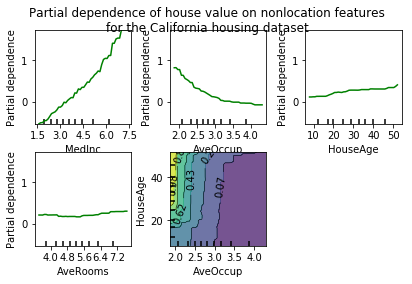

In [126]:
features = [0, 5, 1, 2, (5, 1)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
             'for the California housing dataset')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

(멋있게 보이기 위해) 3차원 그래프도 그려본다.

대부분의 코드는 오직 시각화를 위한 코드이기 때문에 외우지 않아도 된다.

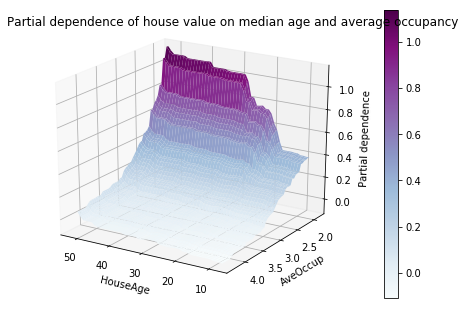

In [127]:
fig = plt.figure()

target_feature = (1, 5)
pdp, axes = partial_dependence(clf, target_feature,
                               X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median age and '
             'average occupancy')
plt.subplots_adjust(top=0.9)

plt.show()